**Introduction*
-

- Note! This dataset is taken from Kaggle by `NIDULA ELGIRIYEWITHANA`, top 1000 streamed Spotify songs on 2023.

- This study analyzes the top 1000 streamed songs on Spotify to investigate whether the type of artist—solo (1), duo (2), or group—affects (3) streaming performance and whether any variables listed below will contribute to a song's success. Utilizing data from these top tracks, I categorize each song by streaming counts into ranks - top 10, 50, 100, 250, 500, 650, 817 to determine trends across different artist types. I will answer three questions, which are evaluated from the main question.


**Question:**
-
- `Main Question`: Artist impact: Analyze how artist involvement and attributes relate to a song's success.

  1. How does the performance vary among solo artists, duos, and groups within the top 10, 50, 100, 250, 500, 650, 817 ranked songs on Spotify?

  2. What song characteristics like key and bpm within the top 10, 50, 100, 250, 500, 650, 817?

**Results**
-

**Question 1**
- Based on the analysis, despite duos (2 artists_count) having a significant proportion in the Top 10, but solo (1 artists_count) streams surpassing duo streams by 15%. Moreover, solo artists consistently achieve higher total streams within the ranked. This indicates a stronger performance impact from solo artists within the top-ranked songs on Spotify.

**Key Findings**
-
**Question 1**
- Based on the analysis, despite duos (2 artists_count) having a significant proportion in the Top 10, but solo (1 artists_count) streams surpassing duo streams by 15%. Moreover, solo artists consistently achieve higher total streams within the ranked. This indicates a stronger performance impact from solo artists within the top-ranked songs on Spotify.

**Question 2**
 - **BPM**
   - BPM does not change much among the ranks, but some valuable information remains.

   - The overall average BPM in each rank is in the range [117, 125].

   - The best BPM range observed in the Top 10 is in [90, 110] (majority).

      - The standard deviation in the top 10 is the highest (33) among all the ranks

         - Majority (6 songs) average key value in the top 10 is 96.5
         
         - Minority (4 songs) average key value in the top 10 is 149.5

   - Consider BPM with a mean of larger than 125:

      - Two outlier songs in top 10 have a mean of 178 BPM, which is a leading component among all the ranks

- **Keys**
   - **Overall Distribution (across all ranks):**

      - C# has the largest proportion 14% in total

      - D# has the smallest proportion 3.68%

      - The proportion of A, B, D, F, F#, G, G# are in the between [8.58%,11.15%]

      - A# and E takes 6.74% and 7.23% respectively

   - **Distribution by Ranking:**

      - C# takes majority in Top 10 (30%) and Top 50 (22.50%)

      - F, E, B, D#, F# do not show up in the top 10 songs
      
      - A does not show up in the top 50 songs

- **Mode**
   - **Overall Distribution (across all ranks):**

      - The dataset contains 451 songs in Major mode and 365 in Minor mode. Major mode exceeds Minor by 19.07%.

   - **Distribution by Ranking:**

      - Top 10 to Top 650: 
         - Major mode predominates in all these rankings.

      - Proportional Decline: 
         - The proportion of songs in Major mode gradually decreases from the Top 10 through the Top 650. The highest proportion is 70% in the Top 10, decreasing to a minimum of 54.67% in the Top 650.

      - Shift in Top 817: 
         - In contrast, the Top 817 ranking shows a slight majority for Minor mode, with 51.20% of songs, compared to 48.80% for Major.

**Hypothesis**
-
1. Songs with multiple artists perform better on streaming platforms than songs by solo artists.



**Variables**
-
 - **response variable**
      - `streams` - Total number of streams on Spotify
 - **Observer**
   - **Numeric**
      - `artists_name`

      - `bpm` - Beats per minute, a measure of song tempo

      - `danceability_%` - Percentage indicating how suitable the song is for dancing

      - `valence_%` - Positivity of the song's musical content

      - `energy_%` - Perceived energy level of the song

      - `acousticness_%` - Amount of acoustic sound in the song

      - `liveness_%` - Presence of live performance elements

      - `speechiness_%` - Amount of spoken words in the song

      - `released_date`

   - **Category**
   
      - `key` - Key of the song

      - `mode` - Mode of the song (major or minor)
      
      - `artists_type` - 1 (artists_count = 1), 2 (artists_count = 2), 3 (artists_count > 3)

**Methodology**
-
 - Collect data 
    - From "top-spotify-songs-2023" (Kaggle)
 - Wrangle data 
    - Cleaning
         - Remove variables that are not related to our topic(Spotify).
         - Remove any rows with empty data
 - Explore 
    - data using available techniques
 - Visualization
    - data to uncover insightful discoveries


**References**
-
- `FGJSPACEMAN`, title : `♫ Spotify 1 - What Does It Take to Hit the Charts`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
spotify_data = pd.read_csv('data/spotify-2023.csv', encoding = 'latin1')

# Display data types inferred by pandas
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotify_data.shape

(953, 24)

In [4]:
spotify_data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [5]:
print(spotify_data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**Data Preprocessing**
-

**Drop the row while `streams` contains unknown values, found it when converting the streams column into integer**

In [7]:
for index, stream in spotify_data['streams'].items():
    if not stream.isnumeric():
        print(index, stream)

spotify_data = spotify_data.drop(574, axis = 0)

574 BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [8]:
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'])

In [10]:
# spotify_data.isna().sum()
missing_data = spotify_data.isna()
has_missing_value = missing_data.any()

for column, missing in has_missing_value.items():
    if missing:
        count = missing_data.sum()[column]
        print(f'Column {column} has {count} missing values')

Column in_shazam_charts has 50 missing values
Column key has 95 missing values


In [11]:
spotify_data.dropna(axis = 0, how = 'any', inplace = True)

In [12]:
spotify_data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [13]:
new_spotify_data = spotify_data.loc[:,:]

In [14]:
playlists_col = new_spotify_data.loc[:, ['in_apple_playlists','in_deezer_playlists', 'in_spotify_playlists']]
# Drop those columes with playlists
new_spotify_data = new_spotify_data.drop(playlists_col.columns, axis = 1)

In [15]:
charts_col = new_spotify_data.loc[:, ['in_apple_charts','in_deezer_charts','in_shazam_charts', 'in_spotify_charts']]

# Drop those columes with chart
new_spotify_data.drop(charts_col.columns, axis = 1, inplace = True)

In [16]:
new_spotify_data['released_date'] = new_spotify_data.loc[:, 'released_year':'released_day'].astype(str).apply(lambda x:"-".join(x), axis = 1)

In [17]:
# Drop those date
new_spotify_data.drop(['released_year','released_month','released_day', 'track_name'], axis = 1, inplace = True)

In [18]:
new_spotify_data.drop(['artist(s)_name'], axis = 1, inplace = True)

In [19]:
def convert_artist_count(count):
    if count >= 3:
        return 3
    else:
        return count
    
new_spotify_data['artists_type'] = new_spotify_data['artist_count'].apply(convert_artist_count).astype('category')

new_spotify_data.drop(['artist_count'], axis = 1, inplace = True)


In [20]:
new_spotify_data['key'].astype('category')

0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 816, dtype: category
Categories (11, object): ['A', 'A#', 'B', 'C#', ..., 'F', 'F#', 'G', 'G#']

**Visualization - Overall data**
-

In [21]:
new_spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   streams             816 non-null    int64   
 1   bpm                 816 non-null    int64   
 2   key                 816 non-null    object  
 3   mode                816 non-null    object  
 4   danceability_%      816 non-null    int64   
 5   valence_%           816 non-null    int64   
 6   energy_%            816 non-null    int64   
 7   acousticness_%      816 non-null    int64   
 8   instrumentalness_%  816 non-null    int64   
 9   liveness_%          816 non-null    int64   
 10  speechiness_%       816 non-null    int64   
 11  released_date       816 non-null    object  
 12  artists_type        816 non-null    category
dtypes: category(1), int64(9), object(3)
memory usage: 83.8+ KB


In [23]:
corr_colume = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

correlation_matrix = new_spotify_data[corr_colume].corr()
correlation_matrix

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,1.000000,-0.025694,-0.093268,-0.051014,-0.036499,-0.005751,-0.033039,-0.056664,-0.099968
bpm,-0.025694,1.000000,-0.148816,0.029743,0.013523,-0.011187,-0.003512,-0.005865,0.037862
danceability_%,-0.093268,-0.148816,1.000000,0.391414,0.158418,-0.241593,-0.102436,-0.100742,0.200489
valence_%,-0.051014,0.029743,0.391414,1.000000,0.349616,-0.063197,-0.146891,0.000249,0.036649
energy_%,-0.036499,0.013523,0.158418,0.349616,1.000000,-0.552592,-0.051599,0.111277,-0.026630
acousticness_%,-0.005751,-0.011187,-0.241593,-0.063197,-0.552592,1.000000,0.046539,-0.046209,-0.018517
instrumentalness_%,-0.033039,-0.003512,-0.102436,-0.146891,-0.051599,0.046539,1.000000,-0.044647,-0.091199
liveness_%,-0.056664,-0.005865,-0.100742,0.000249,0.111277,-0.046209,-0.044647,1.000000,-0.022892
speechiness_%,-0.099968,0.037862,0.200489,0.036649,-0.026630,-0.018517,-0.091199,-0.022892,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

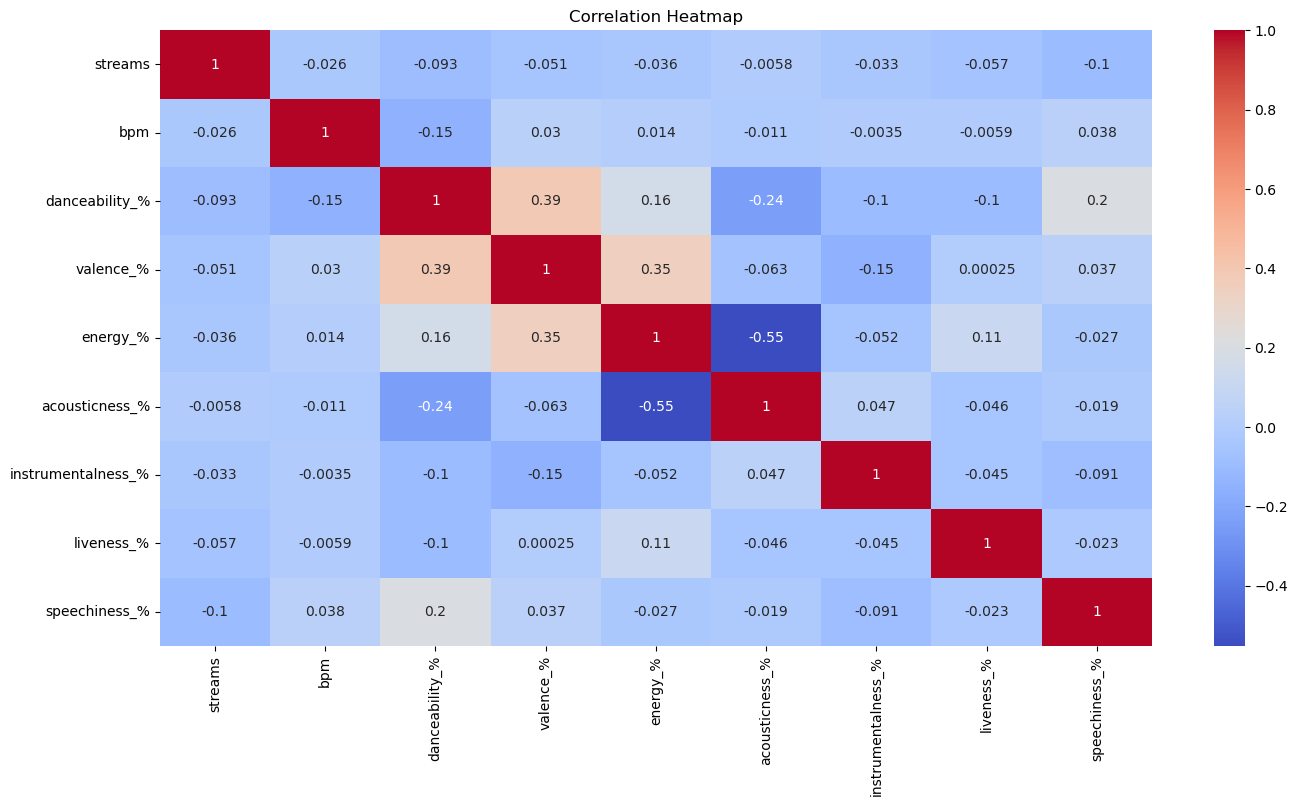

In [24]:
fig = plt.figure(figsize = (16, 8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
plt.title('Correlation Heatmap')

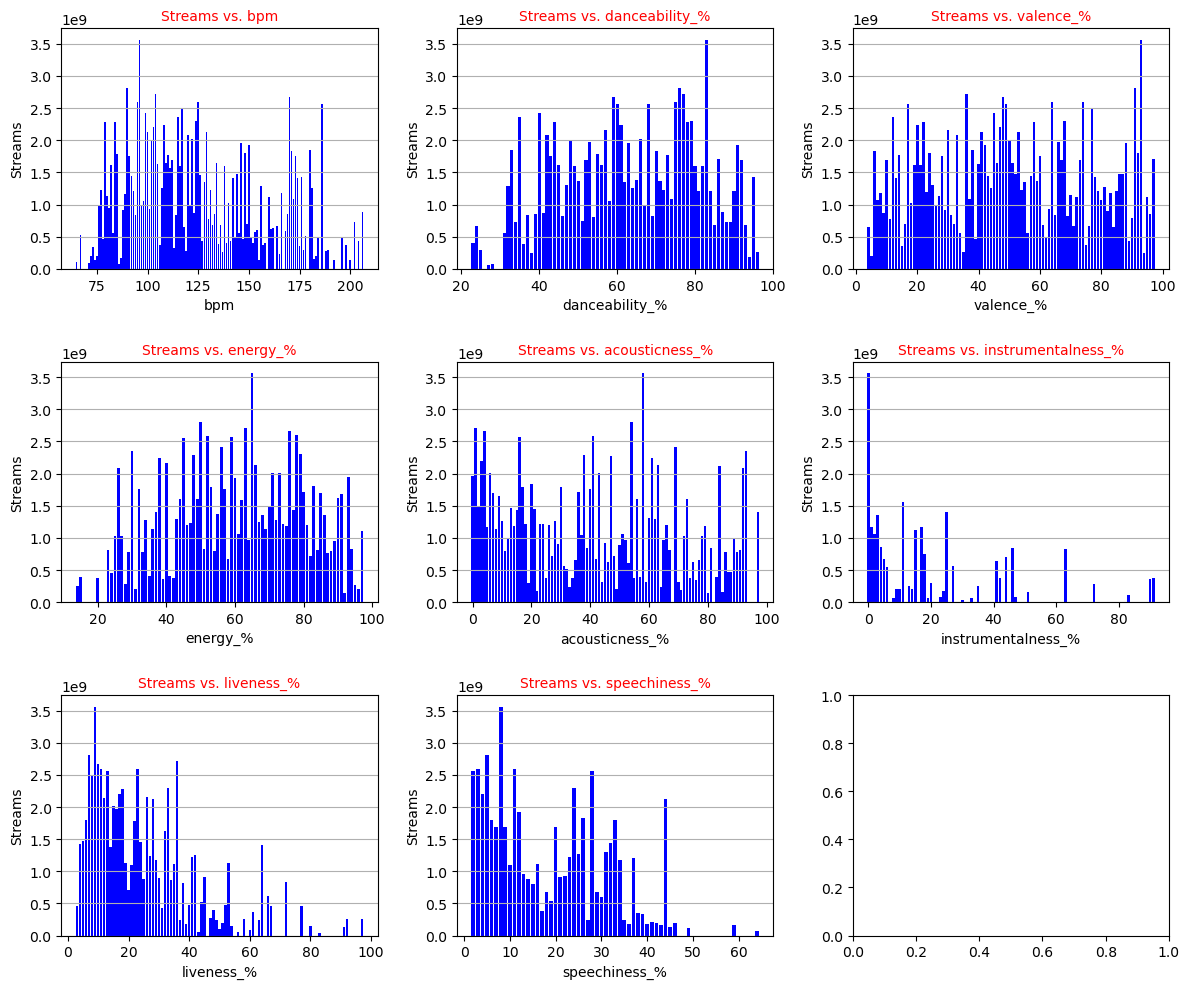

In [26]:
column_needed = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize = (12, 10))

axes = axes.flatten()

for i, col in enumerate(column_needed):
    plt.sca(axes[i])
    plt.bar(new_spotify_data[col], new_spotify_data['streams'], color='blue')
    plt.xlabel(col)
    plt.ylabel('Streams')
    plt.title(f'Streams vs. {col}', fontsize=10, color = 'red')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

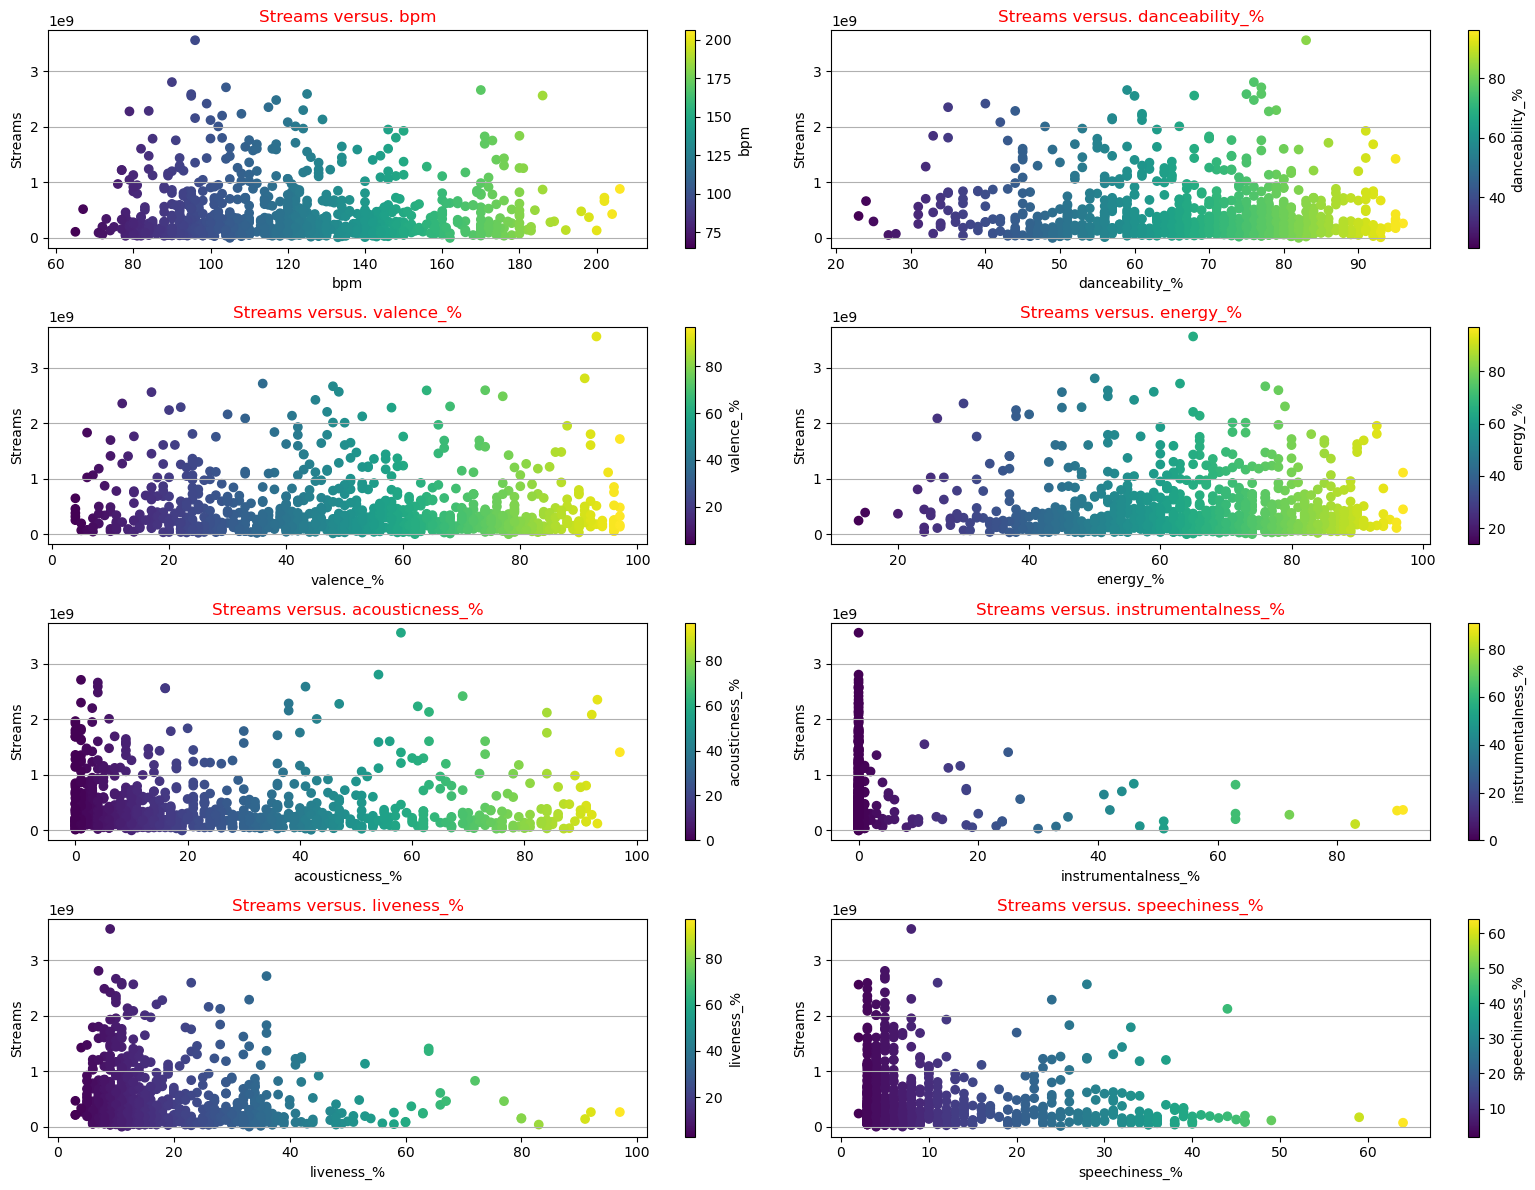

In [30]:
column_needed = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, ax = plt.subplots(4, 2, figsize = (16, 12))

ax = ax.flatten()

for i, col in enumerate(column_needed):
    plt.sca(ax[i])
    scatter = plt.scatter(x = new_spotify_data[col], y = new_spotify_data['streams'], c = new_spotify_data[col], cmap = 'viridis')
    plt.xlabel(col)
    plt.ylabel('Streams')
    plt.title(f'Streams versus. {col}', color = 'red')
    plt.colorbar(scatter, label = col)
    plt.grid(axis = 'y')

plt.tight_layout()
plt.show()

**Artists Type**

Text(0.5, 1.0, 'Artists Type Proportion')

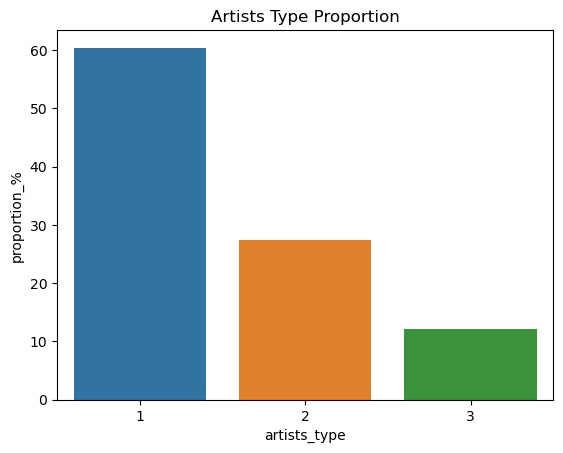

In [31]:
artists_type_counts = new_spotify_data.groupby('artists_type')['artists_type'].count()
total_artists_type = artists_type_counts.sum()
proportion = (artists_type_counts / total_artists_type) * 100
# Convert Series to DataFrame with appropriate column names
proportion_df = pd.DataFrame({
    'artists_type': proportion.index,
    'proportion_%': proportion.values
})

sns.barplot(data = proportion_df, x = 'artists_type', y = 'proportion_%')
plt.title('Artists Type Proportion')

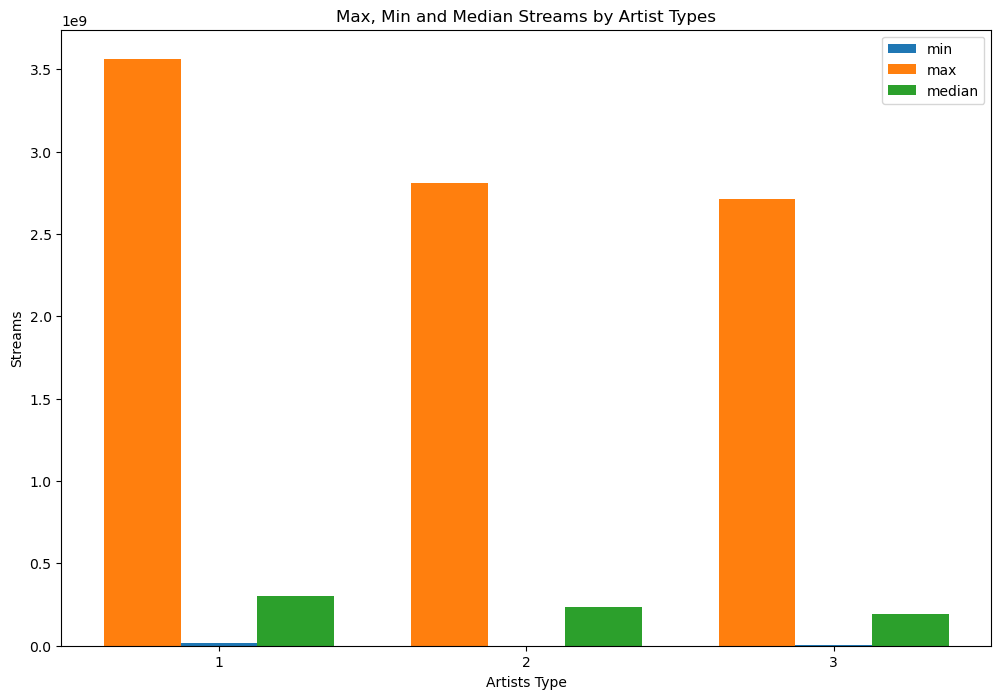

In [32]:
min_streams = new_spotify_data.groupby('artists_type')['streams'].min()
max_streams = new_spotify_data.groupby('artists_type')['streams'].max()
median_streams = new_spotify_data.groupby('artists_type')['streams'].median()

artists_stat = pd.DataFrame({
    'artists_type' : ['1', '2', '3'],
    'min' : min_streams.values,
    'max' : max_streams.values,
    'median' : median_streams.values
})

#position
bar_width = 0.25
br1 = np.arange(len(artists_stat['artists_type']))

plt.figure(figsize = (12, 8))

plt.bar(height = artists_stat['min'], x = br1, width = bar_width, label = 'min')
plt.bar(height = artists_stat['max'], x = br1 - bar_width, width = bar_width, label = 'max')
plt.bar(height = artists_stat['median'], x = br1 + bar_width, width = bar_width, label = 'median')

plt.xlabel('Artists Type')
plt.ylabel('Streams')
plt.title('Max, Min and Median Streams by Artist Types')
plt.xticks(br1, artists_stat['artists_type'])
plt.legend()
plt.show()

**Key**

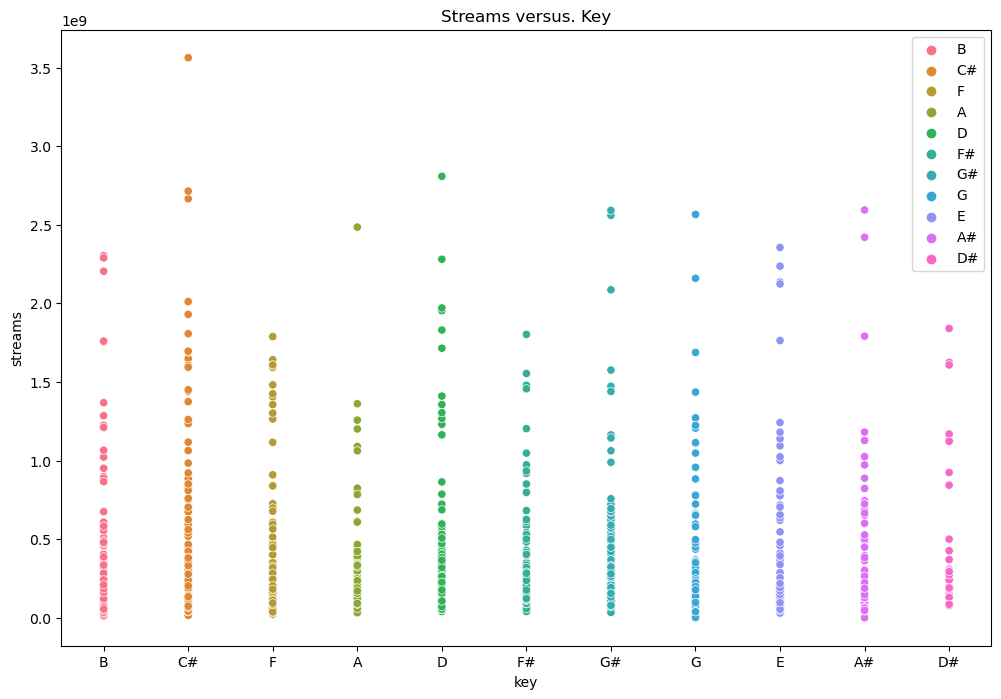

In [267]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'key', y = 'streams', data = new_spotify_data, hue = new_spotify_data['key'])
plt.title('Streams versus. Key')
plt.legend(bbox_to_anchor = (1, 1))

Text(0.5, 1.0, 'Count of Each Keys')

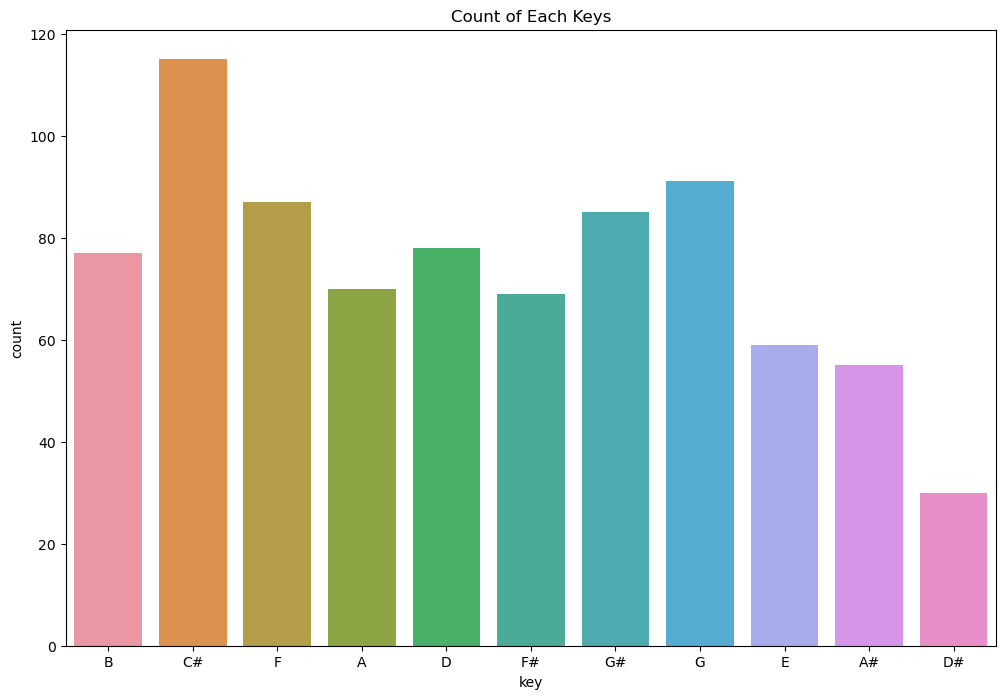

In [34]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'key', data = new_spotify_data)
plt.title('Count of Each Keys')

Text(0, 0.5, 'Percentage')

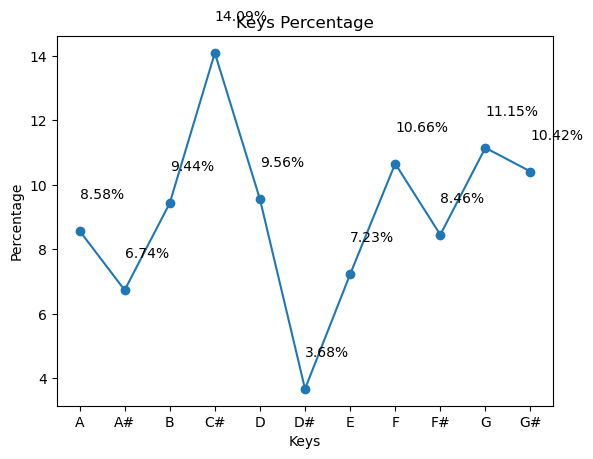

In [391]:
total_keys = new_spotify_data.groupby('key')['key'].count().sum()
percentage_total_each = (new_spotify_data.groupby('key')['key'].count() / total_keys) * 100

plt.plot(percentage_total_each.index, percentage_total_each.values, marker = 'o')

for label, value in zip(percentage_total_each.index, percentage_total_each.values):
    plt.text(label, value + 1, f'{value:.2f}%')

plt.title('Keys Percentage')
plt.xlabel('Keys')
plt.ylabel('Percentage')

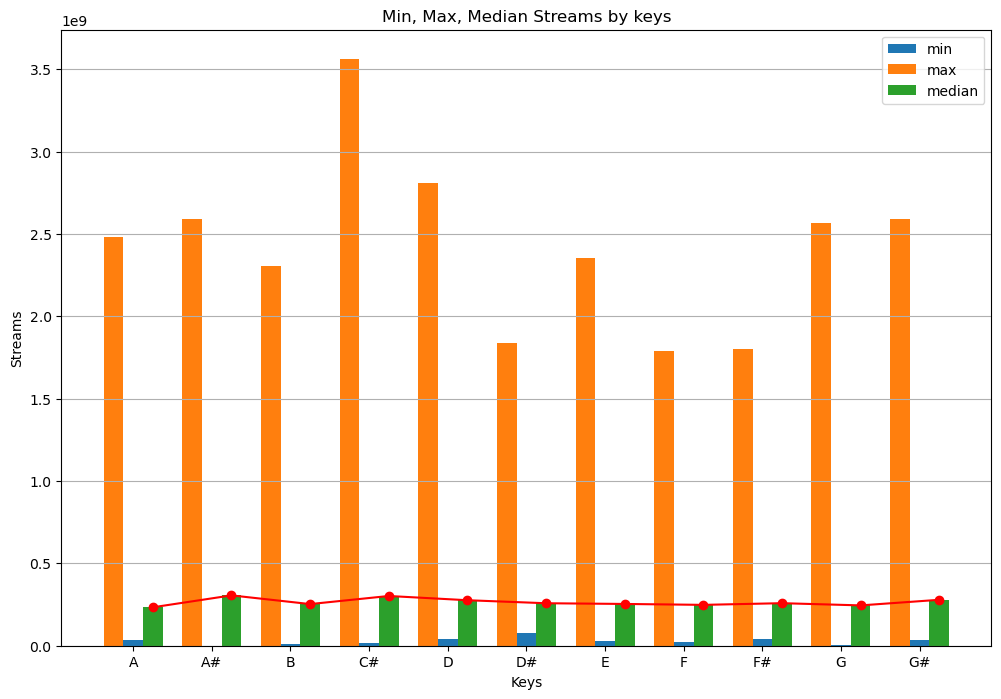

In [35]:
min_streams = new_spotify_data.groupby('key')['streams'].min()
max_streams = new_spotify_data.groupby('key')['streams'].max()
median_streams = new_spotify_data.groupby('key')['streams'].median()

key_stats = pd.DataFrame({
    'min_keys' : min_streams,
    'max_keys' : max_streams,
    'median_keys' : median_streams,
}).reset_index()

plt.figure(figsize = (12, 8))

#position
br1 = np.arange(len(key_stats['min_keys']))
bar_width = 0.25

plt.bar(x = br1, height = key_stats['min_keys'], width = bar_width, label = 'min')
plt.bar(x = br1 - bar_width, height = key_stats['max_keys'], width = bar_width, label = 'max')
plt.bar(x = br1 + bar_width, height = key_stats['median_keys'], width = bar_width, label = 'median')

plt.plot(br1 + bar_width, key_stats['median_keys'], color = 'red', marker = 'o')

plt.xticks(br1, key_stats['key'])
plt.legend()
plt.xlabel('Keys')
plt.ylabel('Streams')
plt.title('Min, Max, Median Streams by keys')
plt.grid(axis = 'y')
plt.show()

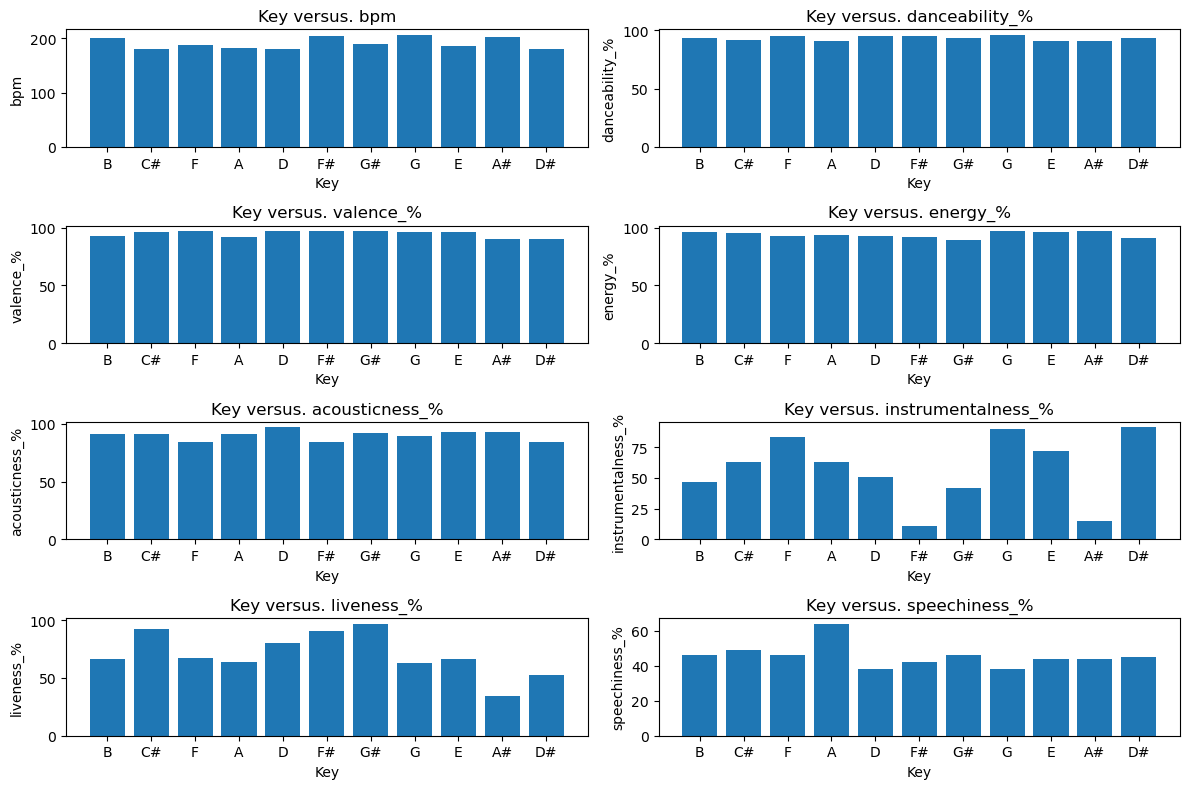

In [37]:
column_needed = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(4, 2, figsize = (12, 8))

axes = axes.flatten()

for i, col in enumerate(column_needed):
    plt.sca(axes[i])
    plt.bar(new_spotify_data['key'], new_spotify_data[col])
    plt.xlabel('Key')
    plt.ylabel(col)
    plt.title(f'Key versus. {col}')

plt.tight_layout()
plt.show()
    

**mode**

<Axes: xlabel='mode', ylabel='count'>

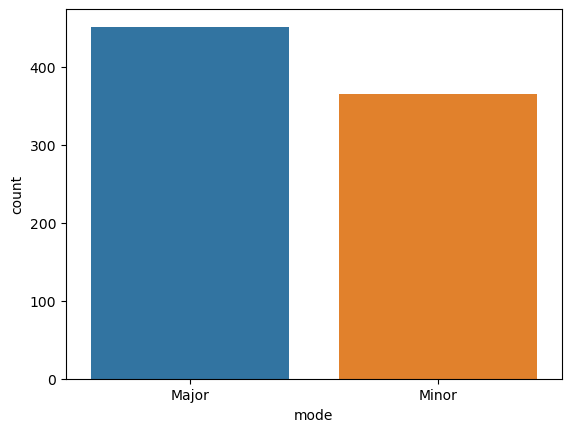

In [38]:
sns.countplot(data = new_spotify_data, x = 'mode')

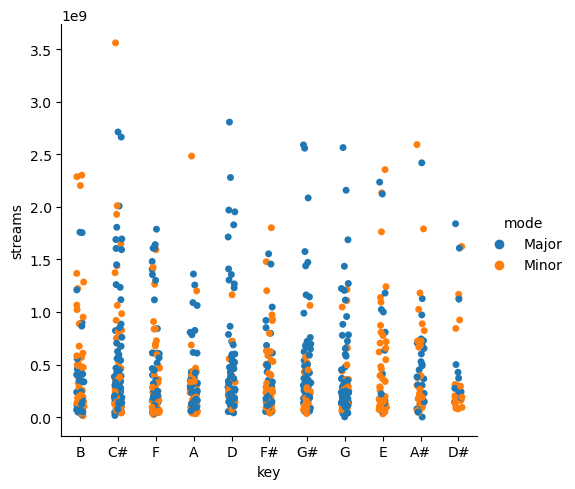

In [39]:
sns.catplot(data = new_spotify_data, x = 'key', y = 'streams', hue = 'mode')

**Visualization - With Subset (rank)**
-

**1. Songs with multiple artists perform better on the number of `streams`?**
- In this case, my observe variables are `artist_count`, `in_spotify_playlists`, `in_spotify_charts`, and `streams`. The other variables will be discussed in question 2 and question 3. Moreover, since there is a huge gap on distribution for each artist_type, so I will seperate them into top_10, top_50, top_100, top_500.

In [199]:
new_spotify_data.shape

(816, 13)

In [171]:
top_10_songs = new_spotify_data.sort_values('streams', ascending = False).head(10)
top_10_songs.describe()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,2.696550e+09,117.700000,69.100000,59.400000,59.600000,26.700000,0.0,13.700000,7.500000
std,3.235676e+08,33.764051,12.827488,24.636017,10.966616,26.149357,0.0,9.031427,7.663043
min,2.420461e+09,90.000000,40.000000,17.000000,45.000000,1.000000,0.0,7.000000,2.000000
25%,2.561029e+09,95.250000,62.000000,45.750000,52.000000,4.000000,0.0,9.000000,3.500000
50%,2.592632e+09,101.500000,75.500000,56.500000,57.500000,16.000000,0.0,10.500000,5.000000
75%,2.701778e+09,123.000000,76.750000,76.250000,64.500000,50.750000,0.0,12.500000,7.250000
max,3.562544e+09,186.000000,83.000000,93.000000,78.000000,69.000000,0.0,36.000000,28.000000


In [125]:
top_50_songs = new_spotify_data.sort_values('streams', ascending = False).iloc[10:50,:]
top_50_songs.describe()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,4.000000e+01,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,1.852769e+09,120.600000,61.475000,48.450000,63.62500,28.075000,0.275000,15.425000,8.075000
std,2.499765e+08,25.569212,15.413926,24.592004,18.87569,30.158035,1.739253,8.781938,8.931039
min,1.481350e+09,79.000000,33.000000,6.000000,26.00000,0.000000,0.000000,6.000000,2.000000
25%,1.637111e+09,103.000000,51.250000,29.500000,48.75000,1.000000,0.000000,9.750000,3.000000
50%,1.789664e+09,116.500000,61.000000,47.000000,66.00000,13.000000,0.000000,11.000000,5.000000
75%,2.030129e+09,135.000000,73.000000,67.000000,79.25000,48.750000,0.000000,19.000000,7.250000
max,2.355720e+09,180.000000,92.000000,97.000000,93.00000,93.000000,11.000000,36.000000,44.000000


In [126]:
top_100_songs = new_spotify_data.sort_values('streams', ascending = False).iloc[50:100,:]
top_100_songs.describe()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.257135e+09,122.220000,65.180000,46.900000,65.680000,21.920000,1.240000,20.100000,9.720000
std,1.204474e+08,30.980764,13.097266,22.794781,15.066438,25.093165,4.679787,14.840994,9.762569
min,1.065580e+09,77.000000,32.000000,8.000000,34.000000,0.000000,0.000000,4.000000,3.000000
25%,1.163225e+09,92.250000,59.000000,25.500000,59.250000,3.250000,0.000000,9.250000,4.000000
50%,1.232841e+09,122.000000,64.500000,47.000000,68.000000,11.500000,0.000000,13.500000,5.000000
75%,1.360210e+09,145.500000,73.000000,59.000000,76.000000,27.500000,0.000000,26.250000,10.000000
max,1.479115e+09,181.000000,95.000000,95.000000,97.000000,97.000000,25.000000,64.000000,37.000000


In [127]:
top_250_songs = new_spotify_data.sort_values('streams', ascending = False).iloc[100:250,:]
top_250_songs.describe()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7.089780e+08,123.633333,67.073333,48.566667,63.800000,24.060000,1.913333,16.860000,9.520000
std,1.578061e+08,31.288743,16.198888,24.165097,14.493229,24.723228,8.459883,11.528215,8.283338
min,4.822575e+08,67.000000,24.000000,4.000000,23.000000,0.000000,0.000000,5.000000,3.000000
25%,5.835714e+08,97.000000,57.000000,27.000000,55.000000,4.000000,0.000000,9.000000,4.000000
50%,6.794865e+08,120.000000,70.500000,49.500000,63.500000,14.000000,0.000000,12.000000,6.000000
75%,8.239736e+08,145.000000,79.000000,65.000000,74.000000,38.750000,0.000000,21.000000,11.000000
max,1.062957e+09,206.000000,93.000000,97.000000,94.000000,91.000000,63.000000,72.000000,34.000000


In [128]:
top_500_songs = new_spotify_data.sort_values('streams', ascending = False).iloc[250:500,:]
top_500_songs.describe()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,2.500000e+02,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.103877e+08,122.20400,67.204000,51.952000,63.972000,26.712000,2.224000,18.188000,10.144000
std,8.011390e+07,28.08697,14.842763,23.470688,17.406411,24.759831,11.393554,14.651804,9.164016
min,1.949027e+08,72.00000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,2.432401e+08,100.00000,58.000000,35.250000,53.250000,6.000000,0.000000,10.000000,4.000000
50%,2.996413e+08,120.00000,70.000000,53.500000,66.000000,19.000000,0.000000,12.000000,6.000000
75%,3.684387e+08,140.00000,78.750000,71.000000,76.000000,40.000000,0.000000,21.750000,12.750000
max,4.805070e+08,204.00000,96.000000,97.000000,97.000000,92.000000,91.000000,97.000000,46.000000


In [204]:
top_650_songs = new_spotify_data.sort_values('streams', ascending = False).iloc[500:650,:]
top_817_songs = new_spotify_data.sort_values('streams', ascending = False).iloc[650:817,:]

In [249]:
artists_set = new_spotify_data[['artists_type','streams']].copy()

ranges = [(0, 10), (10, 50), (50, 100), (100, 250), (250, 500), (500, 650), (650, 817)]

all_top_count = pd.DataFrame(columns=['artists_type','proportion', 'count', 'sum_streams', 'rank'])

for i, (start, end) in enumerate(ranges):
    top_n = artists_set.sort_values('streams', ascending=False).iloc[start:end]
    
    counttype = ((top_n['artists_type'].value_counts() / top_n['artists_type'].count()) * 100).reset_index()
    counttype.columns = ['artists_type', 'proportion']
    
    counttype['count'] = top_n['artists_type'].value_counts().values
    counttype['sum_streams'] = top_n.groupby('artists_type')['streams'].sum().values
    counttype['rank'] = f"Top{end}"
    
    all_top_count = pd.concat([all_top_count,counttype], axis = 0)

all_top_count

,artists_type,proportion,count,sum_streams,rank
0,2,50.000000,5,11136574435,Top10
1,1,40.000000,4,13115007347,Top10
2,3,10.000000,1,2713922350,Top10
0,1,77.500000,31,56995798201,Top50
1,2,17.500000,7,13556204353,Top50
2,3,5.000000,2,3558758332,Top50
0,1,70.000000,35,44497476624,Top100
1,2,24.000000,12,14796426455,Top100
2,3,6.000000,3,3562843150,Top100
0,1,61.333333,92,67020363318,Top250


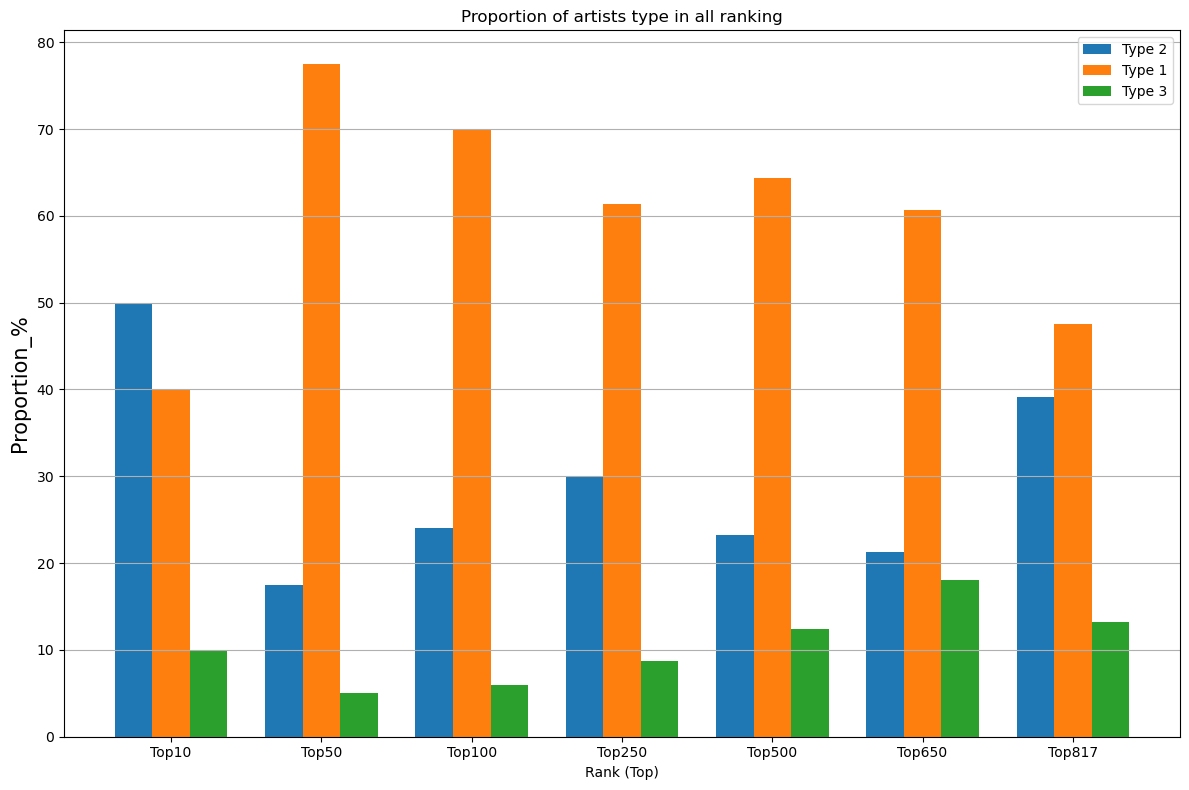

In [250]:
plt.figure(figsize=(12, 8))

#position
rank_labels = all_top_count['rank'].unique()
artist_types = all_top_count['artists_type'].unique()

bar_width = 0.25
positions = np.arange(len(rank_labels))
offsets = np.arange(len(artist_types)) * bar_width

for i, artist_type in enumerate(artist_types):
    counts = all_top_count[all_top_count['artists_type'] == artist_type]['proportion']
    plt.bar(positions + offsets[i], counts, bar_width, label=f'Type {artist_type}')

plt.xlabel('Rank (Top)')
plt.ylabel('Proportion_%', fontsize = 15)
plt.title('Proportion of artists type in all ranking')

plt.xticks(positions + bar_width, rank_labels)
plt.grid(axis = 'y')
plt.legend()
plt.tight_layout()
plt.show()

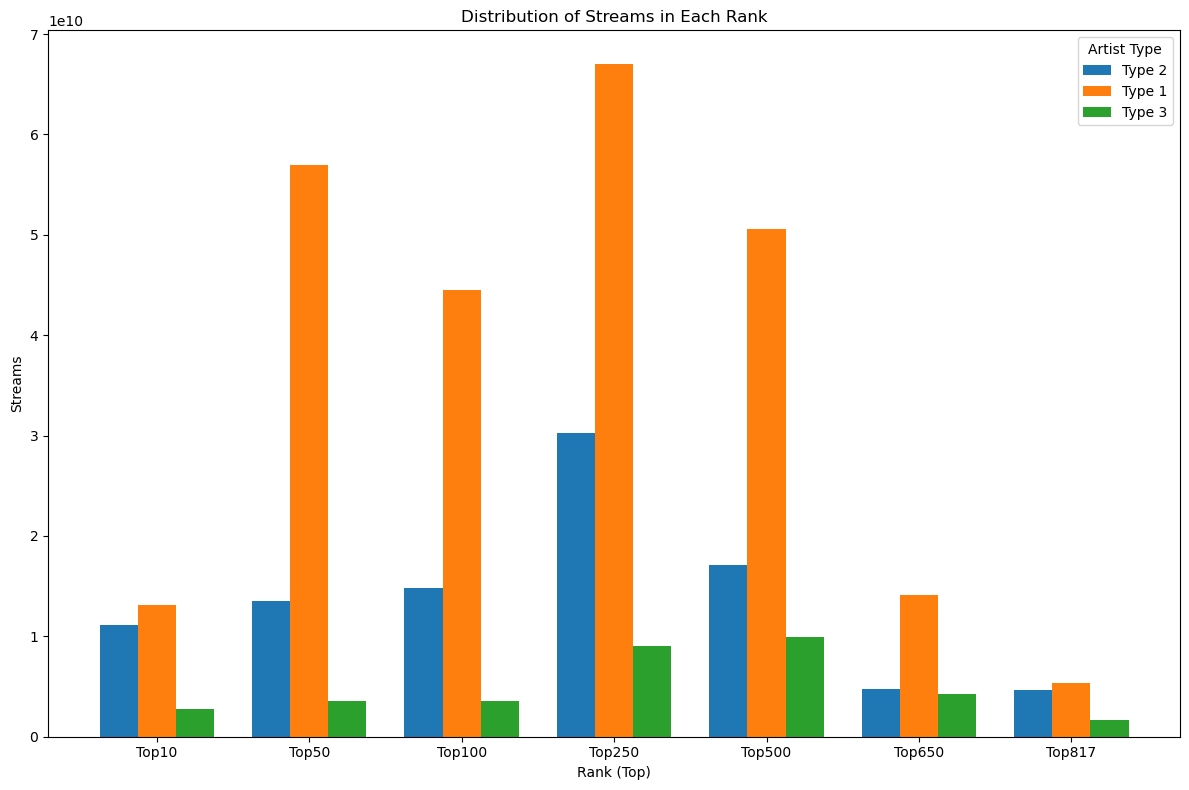

In [274]:
plt.figure(figsize=(12, 8))

bar_width = 0.25
rank_labels = all_top_count['rank'].unique()
artist_types = all_top_count['artists_type'].unique()


positions = np.arange(len(rank_labels))


for i, artist_type in enumerate(artist_types):
    total_streams = []
    for rank in rank_labels:
        streams = all_top_count[(all_top_count['rank'] == rank) & (all_top_count['artists_type'] == artist_type)]['sum_streams']
        if not streams.empty:
            total_streams.append(streams.values[0])
        else:
            total_streams.append(0)
    
    plt.bar(positions + i * bar_width, total_streams, bar_width, label=f'Type {artist_type}')

plt.xlabel('Rank (Top)')
plt.ylabel('Streams')
plt.title('Distribution of Streams in Each Rank')

plt.xticks(positions + bar_width * (len(artist_types) - 1) / 2, rank_labels)

plt.legend(title='Artist Type')
plt.tight_layout()
plt.show()


In [252]:
all_top_count

,artists_type,proportion,count,sum_streams,rank
0,2,50.000000,5,11136574435,Top10
1,1,40.000000,4,13115007347,Top10
2,3,10.000000,1,2713922350,Top10
0,1,77.500000,31,56995798201,Top50
1,2,17.500000,7,13556204353,Top50
2,3,5.000000,2,3558758332,Top50
0,1,70.000000,35,44497476624,Top100
1,2,24.000000,12,14796426455,Top100
2,3,6.000000,3,3562843150,Top100
0,1,61.333333,92,67020363318,Top250


In [253]:
type1_top10 = all_top_count[(all_top_count['rank'] == 'Top10') & (all_top_count['artists_type'] == 1)]['sum_streams'].values
type2_top10 = all_top_count[(all_top_count['rank'] == 'Top10') & (all_top_count['artists_type'] == 2)]['sum_streams'].values

diff = (type1_top10 - type2_top10) / type1_top10

diff * 100

array([15.085259654487023], dtype=object)

**Analysis: BPM**
-

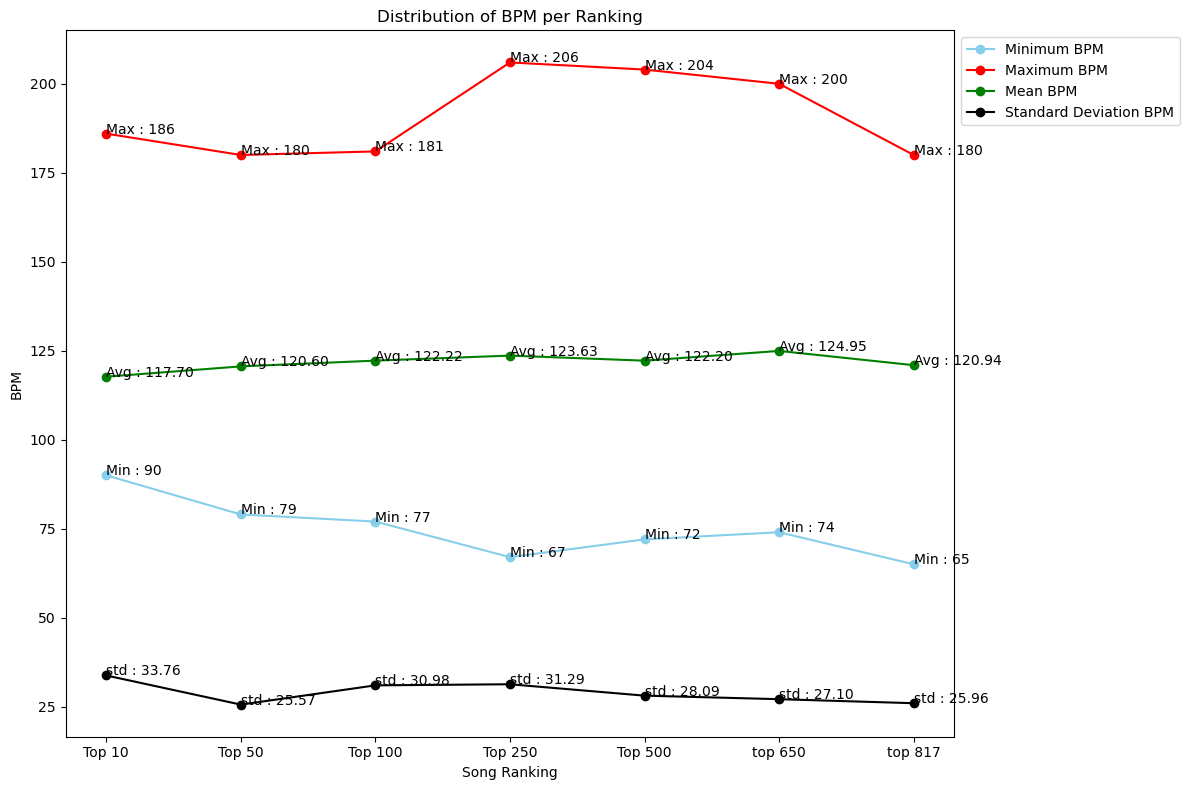

In [447]:
bpm_min = []
bpm_max = []
bpm_avg = []
bpm_std = []

rank_songs = [top_10_songs, top_50_songs, top_100_songs, top_250_songs, top_500_songs, top_650_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 250', 'Top 500', 'top 650', 'top 817']

plt.figure(figsize=(12,8))

for df_ranking in rank_songs:
    bpm_min.append(df_ranking['bpm'].min())
    bpm_max.append(df_ranking['bpm'].max())
    bpm_avg.append(df_ranking['bpm'].mean())
    bpm_std.append(df_ranking['bpm'].std())

plt.plot(labels, bpm_min, marker='o', linestyle='-', color='skyblue', label='Minimum BPM')
plt.plot(labels, bpm_max, marker='o', linestyle='-', color='red', label='Maximum BPM')
plt.plot(labels, bpm_avg, marker='o', linestyle='-', color='green', label='Mean BPM')
plt.plot(labels, bpm_std, marker='o', linestyle='-', color='black', label='Standard Deviation BPM')

plt.xlabel('Song Ranking')
plt.ylabel('BPM')
plt.title('Distribution of BPM per Ranking')

for i, (min, max, avg, std) in enumerate(zip(bpm_min, bpm_max, bpm_avg, bpm_std)):
    plt.text(i, min, f'Min : {min}', fontsize=10)
    plt.text(i, max, f'Max : {max}', fontsize=10)
    plt.text(i, avg, f'Avg : {avg:.2f}', fontsize=10)
    plt.text(i, std, f'std : {std:.2f}', fontsize=10)

plt.legend(bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.show()

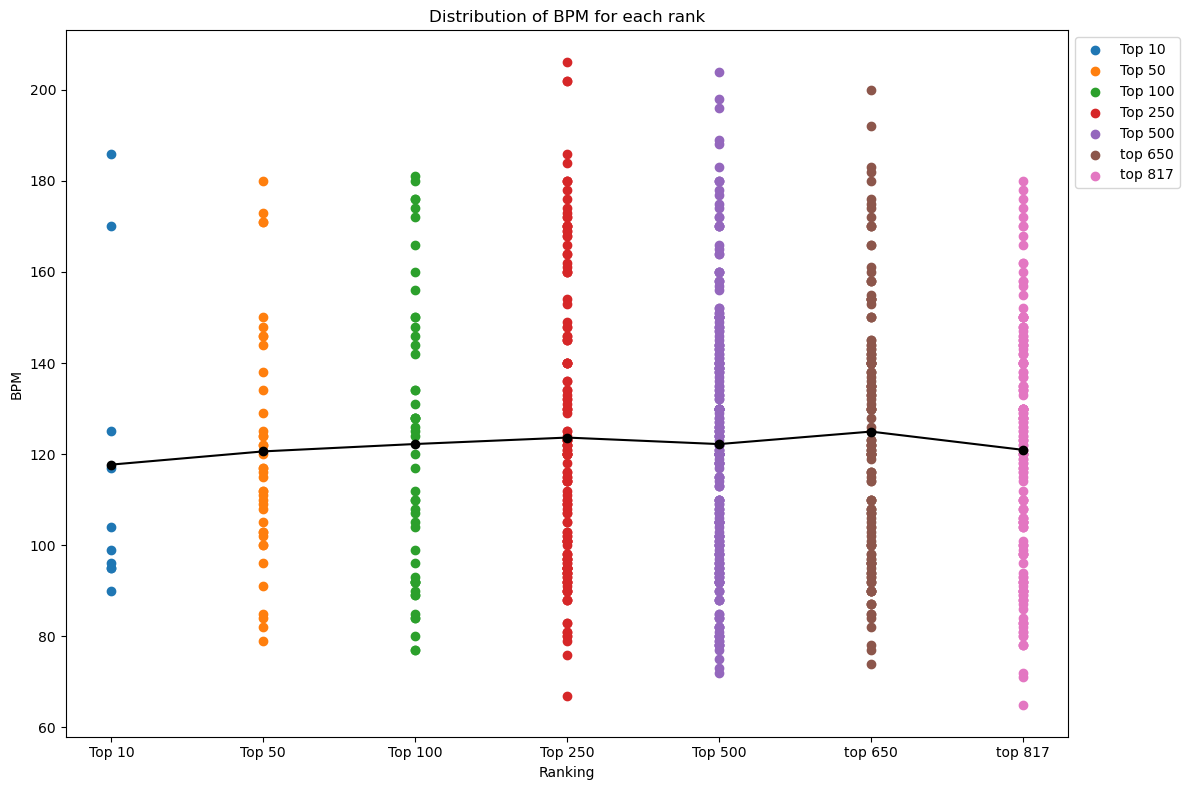

In [207]:
avg = []

plt.figure(figsize=(12, 8))
for i, df in enumerate(rank_songs):
    plt.scatter([i] * len(df), df['bpm'], label=labels[i])
    avg.append(df['bpm'].mean())

plt.plot(range(len(rank_songs)), avg, marker = 'o', color = 'black')

plt.xlabel('Ranking')
plt.ylabel('BPM')
plt.title('Distribution of BPM for each rank')
plt.xticks(range(len(rank_songs)), labels)

plt.legend(bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.show()

In [231]:
top_10_songs[top_10_songs['bpm'] > 110]

,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,artists_type
84,2665343922,170,C#,Major,59,48,76,4,0,10,5,2021-7-9,2
140,2594040133,125,A#,Minor,77,74,78,4,0,23,11,2017-1-31,1
48,2565529693,186,G,Major,68,49,59,16,0,13,28,2016-9-21,2
693,2484812918,117,A,Minor,76,77,52,4,0,8,3,2019-6-19,2


In [235]:
top_10_songs[top_10_songs['bpm'] > 125]['bpm'].mean()

178.0

In [236]:
top_250_songs[top_250_songs['bpm'] > 125]['bpm'].mean()

157.57894736842104

Text(0, 0.5, 'bpm (Avg > 125)')

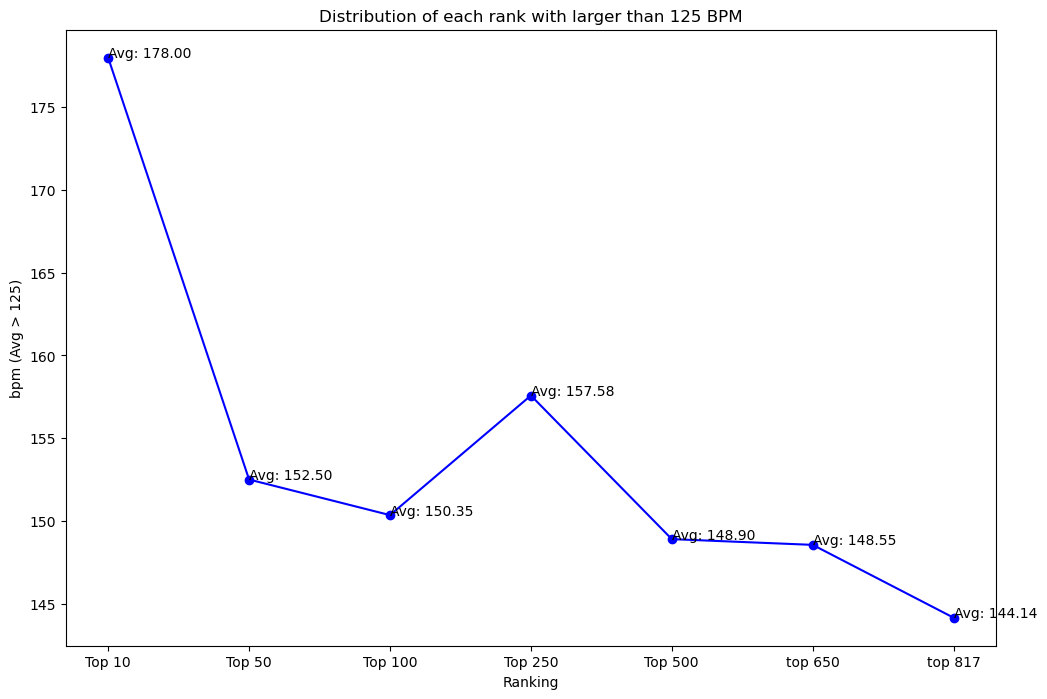

In [248]:
# See which rank reached average 149.5 like top 10 songs
avg_above_125 = []

plt.figure(figsize = (12, 8))


for df in rank_songs:
    avg_above_125.append(df[df['bpm'] > 125]['bpm'].mean())

plt.plot(labels, avg_above_125, color = 'blue', marker = 'o')

for i, avg in enumerate(avg_above_125):
    plt.text(i, avg, f'Avg: {avg:.2f}', fontsize = 10)

plt.title('Distribution of each rank with larger than 125 BPM')
plt.xlabel('Ranking')
plt.ylabel('bpm (Avg > 125)')

**Analysis: Key**
-

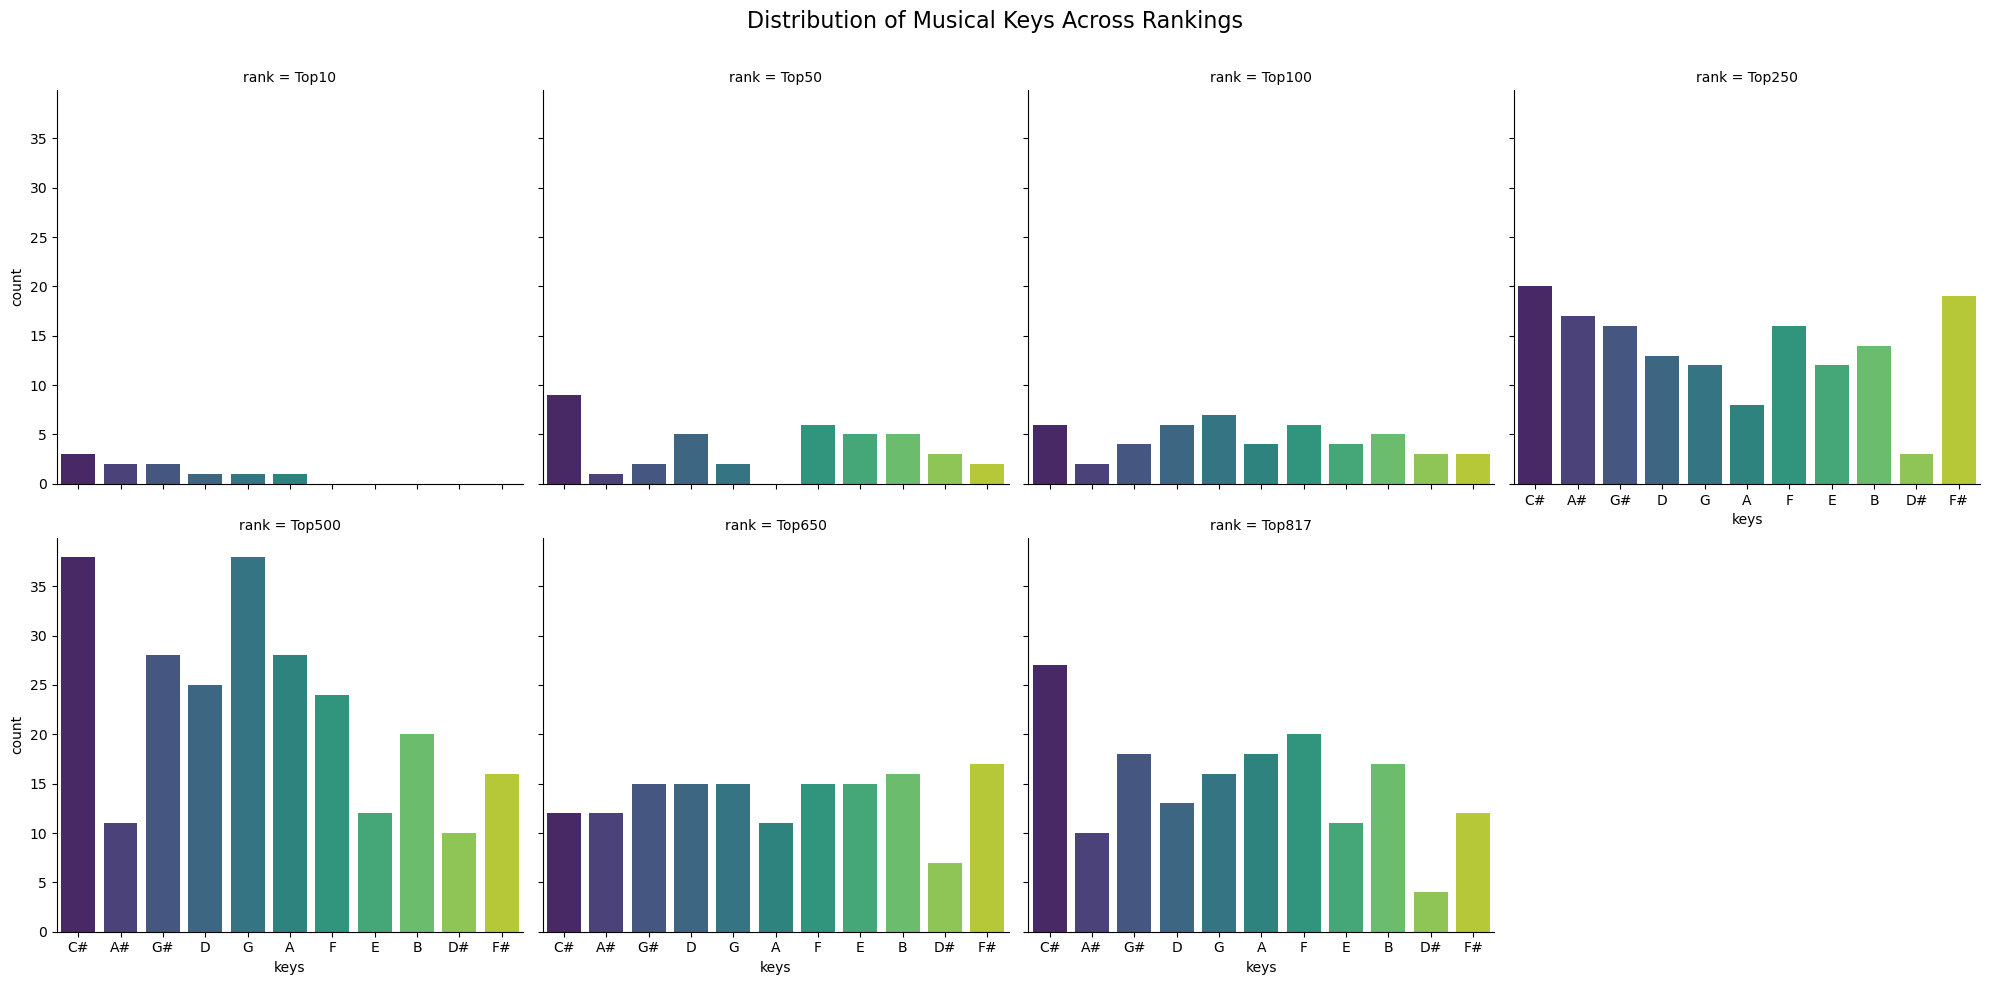

In [356]:
df_available_keys = pd.DataFrame(columns = ['keys', 'count', 'rank'])

for i, df in enumerate(rank_songs):
    curr_df = df['key'].value_counts().reset_index()
    curr_df.columns = ['keys', 'count']
    curr_df['rank'] = rank_labels[i]
    df_available_keys = pd.concat([df_available_keys, curr_df], axis = 0)

g = sns.catplot(
    data = df_available_keys,
    x = 'keys', 
    y = 'count',  
    col = 'rank', 
    col_wrap = 4,
    kind = 'bar', 
    palette = 'viridis'
)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Musical Keys Across Rankings', fontsize=16)

plt.show()

In [362]:
df_available_keys

,keys,count,rank
0,C#,3,Top10
1,A#,2,Top10
2,G#,2,Top10
3,D,1,Top10
4,G,1,Top10
...,...,...,...
6,D,13,Top817
7,F#,12,Top817
8,E,11,Top817
9,A#,10,Top817


Text(0, 0.5, 'Percentage')

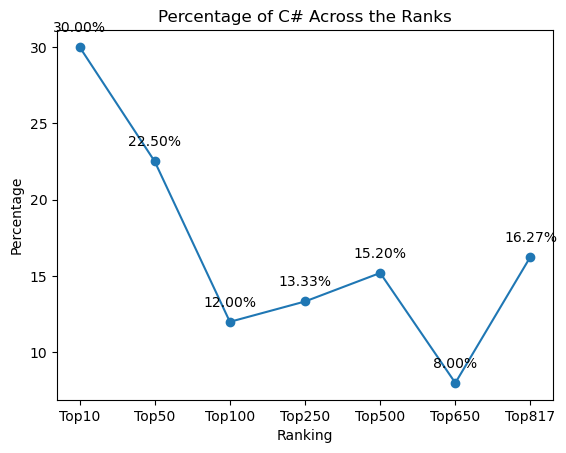

In [372]:
proportions_csharp = []
labels = ['Top10', 'Top50', 'Top100', 'Top250', 'Top500', 'Top650', 'Top817']

for label in labels:
    total_keys =  df_available_keys[df_available_keys['rank'] == label]['count'].sum()
    csharp_count = df_available_keys[(df_available_keys['rank'] == label) & (df_available_keys['keys'] != 'C#')]['count'].sum()
    proportion = ((total_keys - csharp_count) / total_keys) * 100
    proportions_csharp.append(proportion)

plt.plot(labels, proportions_csharp, marker = 'o')

for label, value in zip(labels, proportions_csharp):
    plt.text(label, value + 1, f'{value:.2f}%', ha='center')

plt.title('Percentage of C# Across the Ranks')
plt.xlabel('Ranking')
plt.ylabel('Percentage')

**Analysis: Mode**
-

Text(0.5, 1.0, 'Distribution of Mode across the ranks')

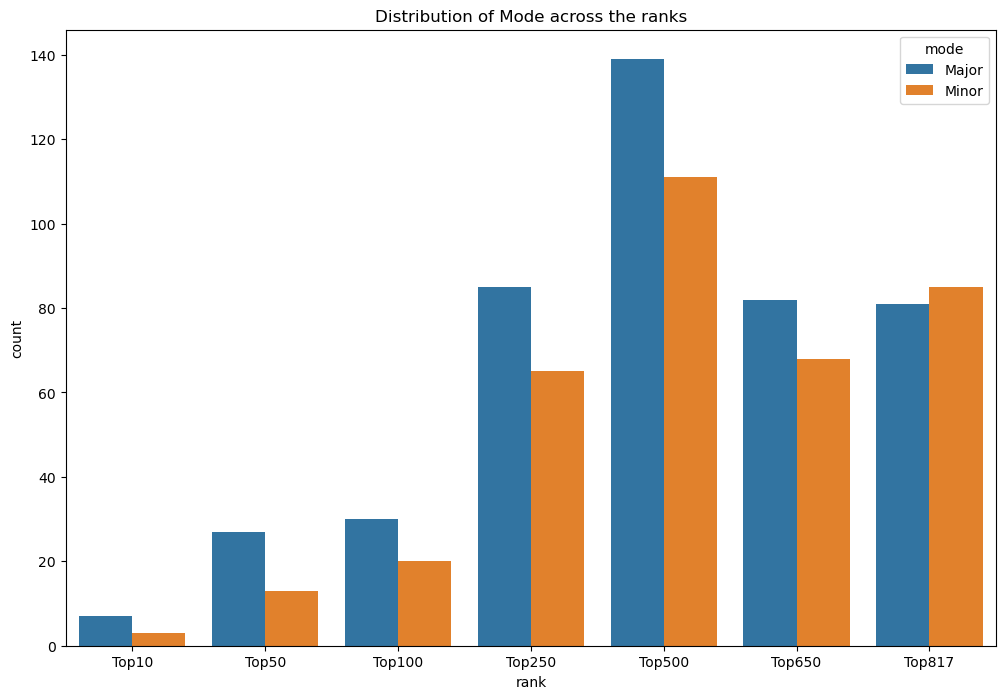

In [431]:
mode_df = pd.DataFrame(columns = ['mode', 'count', 'proportion', 'rank'])

for i, df in enumerate(rank_songs):
    new_data = df['mode'].value_counts().reset_index()
    new_data.columns = ['mode', 'count']
    new_data['proportion'] = (new_data['count'] / df['mode'].count()) * 100
    new_data['rank'] = rank_labels[i]
    
    mode_df = pd.concat([mode_df, new_data], axis = 0)

plt.figure(figsize = (12, 8))

sns.barplot(x = 'rank', y = 'count', hue = 'mode', data = mode_df)
plt.title('Distribution of Mode across the ranks')

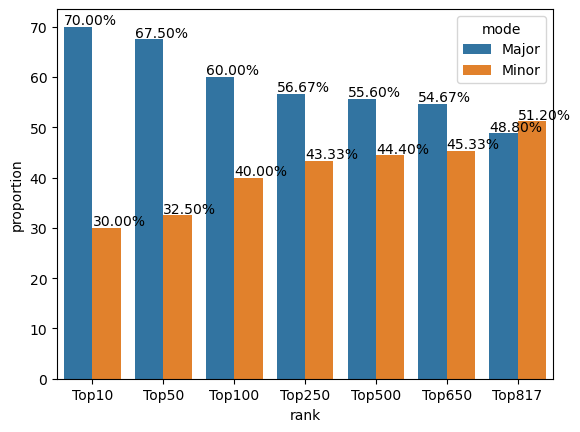

In [442]:
ax = sns.barplot(x = 'rank', y = 'proportion', data = mode_df, hue = 'mode')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 0.5, f'{height:.2f}%')

**Analysis: danceablity**
-

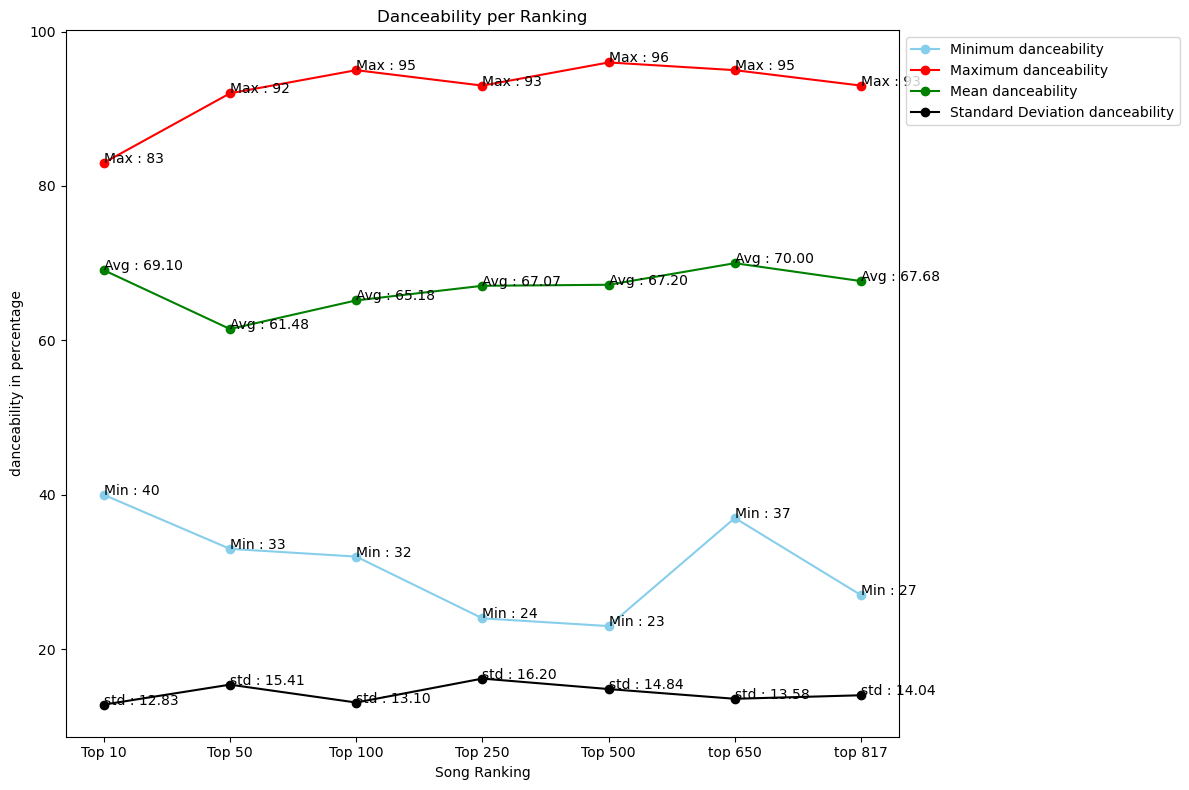

In [448]:
dance_min = []
dance_max = []
dance_avg = []
dance_std = []

rank_songs = [top_10_songs, top_50_songs, top_100_songs, top_250_songs, top_500_songs, top_650_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 250', 'Top 500', 'top 650', 'top 817']

plt.figure(figsize=(12,8))

for df_ranking in rank_songs:
    dance_min.append(df_ranking['danceability_%'].min())
    dance_max.append(df_ranking['danceability_%'].max())
    dance_avg.append(df_ranking['danceability_%'].mean())
    dance_std.append(df_ranking['danceability_%'].std())

plt.plot(labels, dance_min, marker='o', linestyle='-', color='skyblue', label='Minimum danceability')
plt.plot(labels, dance_max, marker='o', linestyle='-', color='red', label='Maximum danceability')
plt.plot(labels, dance_avg, marker='o', linestyle='-', color='green', label='Mean danceability')
plt.plot(labels, dance_std, marker='o', linestyle='-', color='black', label='Standard Deviation danceability')

plt.xlabel('Song Ranking')
plt.ylabel('danceability in percentage')
plt.title('Danceability per Ranking')

for i, (min, max, avg, std) in enumerate(zip(dance_min, dance_max, dance_avg, dance_std)):
    plt.text(i, min, f'Min : {min}', fontsize=10)
    plt.text(i, max, f'Max : {max}', fontsize=10)
    plt.text(i, avg, f'Avg : {avg:.2f}', fontsize=10)
    plt.text(i, std, f'std : {std:.2f}', fontsize=10)

plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()